# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [14]:
# A + B will not work, because A and B need to have same dimensionality! 

In [15]:
# A * B (element-wise mutliplication) will not work, because A and B need to have same dimensionality! 

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [24]:
# A.dot(C) will not work, because shapes (2,3) and (6,2) are not aligned: 3 (dim 1) != 6 (dim 0)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('./data/banknotes.csv')

In [26]:
df.head()

variace  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0

In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
import notebook
import seaborn as sns

/home/arcyfelix/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


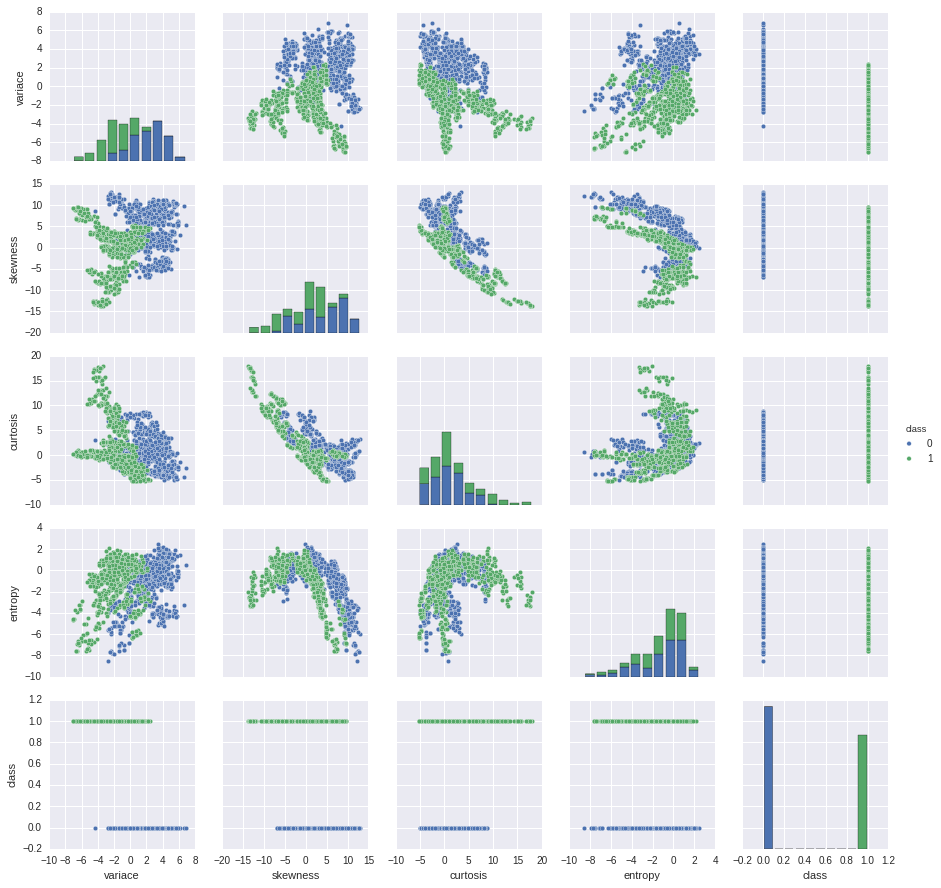

In [29]:
sns.pairplot(df, hue = "class")

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [31]:
X = scale(df.drop('class', axis = 1).values)
y = df['class'].values

In [32]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99344978,  0.99124726,  0.99343545])

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [34]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [35]:
K.clear_session()

model = Sequential()
model.add(Dense(1, 
                input_shape = (4,), 
                activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.9391 - acc: 0.2812     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.8725 - acc: 0.3427     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.8163 - acc: 0.4187     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.7687 - acc: 0.4844     
Epoc

In [36]:
historydf = pd.DataFrame(history.history, 
                         index = history.epoch)

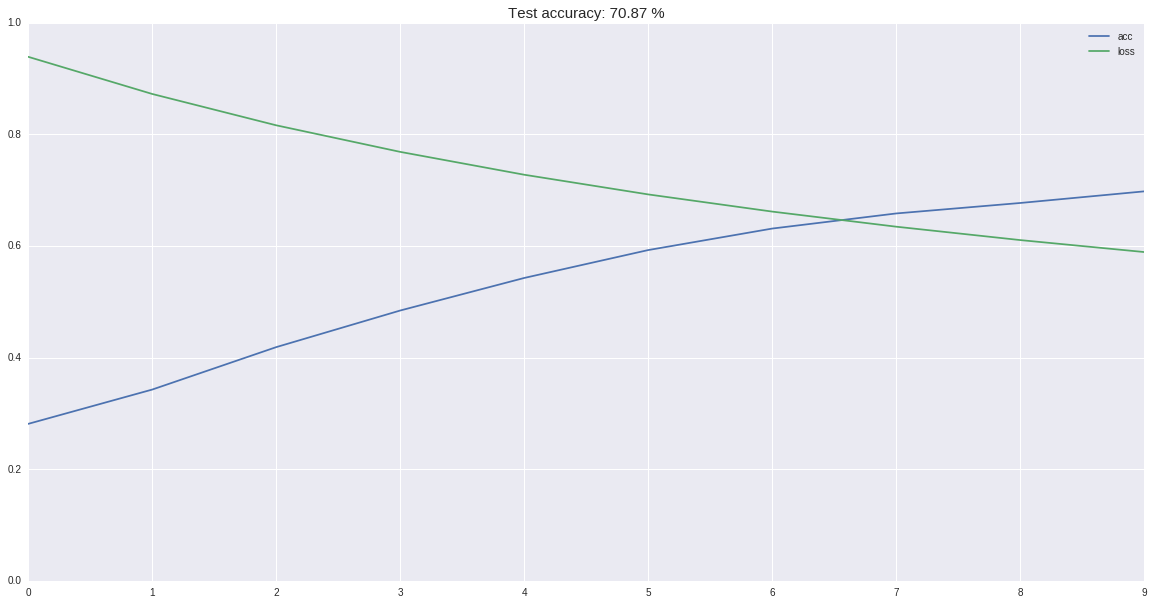

In [37]:
historydf.plot(figsize = (20, 10),
               ylim = (0,1))
plt.title("Test accuracy: {:3.2f} %".format(result[1]*100), fontsize = 15)

### Learning Rates

In [38]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, 
                    input_shape = (4,), 
                    activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',
                  optimizer = SGD(lr = lr),
                  metrics = ['accuracy'])
    h = model.fit(X_train, 
                  y_train, 
                  batch_size = 16, 
                  verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, 
                               index = h.epoch))

In [39]:
historydf = pd.concat(dflist, axis = 1)

In [40]:
historydf

acc      loss       acc      loss       acc      loss       acc  \
0  0.697917  0.537055  0.809375  0.427265  0.736458  0.553194  0.891667   
1  0.734375  0.506125  0.859375  0.353674  0.909375  0.320803  0.967708   
2  0.764583  0.479285  0.891667  0.302116  0.926042  0.248919  0.975000   
3  0.787500  0.455732  0.919792  0.264233  0.942708  0.205991  0.977083   
4  0.809375  0.434758  0.936458  0.235348  0.958333  0.177462  0.977083   
5  0.825000  0.415899  0.943750  0.212841  0.960417  0.157134  0.980208   
6  0.834375  0.398836  0.946875  0.194921  0.964583  0.141764  0.980208   
7  0.842708  0.383279  0.954167  0.180270  0.966667  0.129975  0.981250   
8  0.855208  0.369010  0.960417  0.168200  0.969792  0.120655  0.981250   
9  0.863542  0.355921  0.963542  0.158036  0.969792  0.113074  0.981250   

       loss  
0  0.312585  
1  0.129566  
2  0.095913  
3  0.079573  
4  0.071925  
5  0.065727  
6  0.061169  
7  0.057541  
8  0.055030  
9  0.052718

In [41]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names = ['learning_rate', 'metric'])

historydf.columns = idx

In [42]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.697917  0.537055  0.809375  0.427265  0.736458  0.553194   
1              0.734375  0.506125  0.859375  0.353674  0.909375  0.320803   
2              0.764583  0.479285  0.891667  0.302116  0.926042  0.248919   
3              0.787500  0.455732  0.919792  0.264233  0.942708  0.205991   
4              0.809375  0.434758  0.936458  0.235348  0.958333  0.177462   
5              0.825000  0.415899  0.943750  0.212841  0.960417  0.157134   
6              0.834375  0.398836  0.946875  0.194921  0.964583  0.141764   
7              0.842708  0.383279  0.954167  0.180270  0.966667  0.129975   
8              0.855208  0.369010  0.960417  0.168200  0.969792  0.120655   
9              0.863542  0.355921  0.963542  0.158036  0.969792  0.113074   

learning_rate      0.50            
metric              acc      loss  
0              0.891667  0.312585  
1              0.967708  0.129566  
2              0.975000  0.095913  
3              0.977083  0.079573  
4              0.977083  0.071925  
5              0.980208  0.065727  
6              0.980208  0.061169  
7              0.981250  0.057541  
8              0.981250  0.055030  
9              0.981250  0.052718

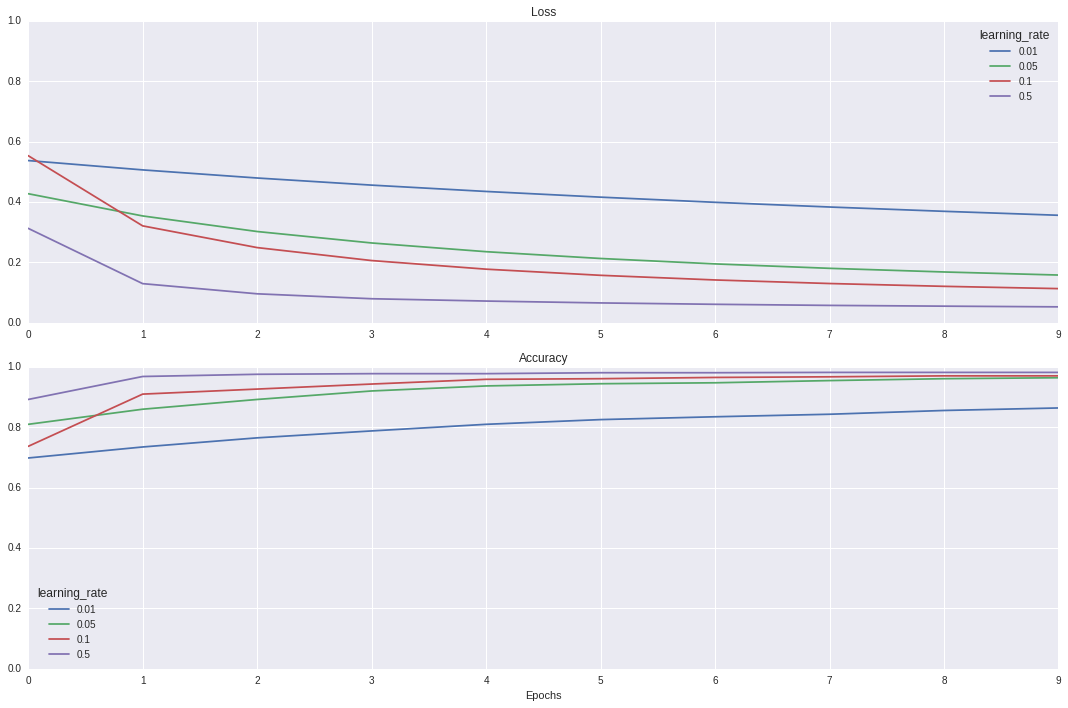

In [43]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = plt.subplot(211)
historydf.xs('loss', 
             axis = 1, 
             level = 'metric').plot(ylim = (0,1), 
                                    ax = ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', 
             axis = 1, 
             level = 'metric').plot(ylim = (0,1), 
                                    ax = ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [44]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, 
                    input_shape = (4,),
                    activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'sgd',
                  metrics = ['accuracy'])
    h = model.fit(X_train, 
                  y_train, 
                  batch_size = batch_size, 
                  verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, 
                               index = h.epoch))

In [45]:
historydf = pd.concat(dflist, 
                      axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names = ['batch_size', 'metric'])
historydf.columns = idx

In [46]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.722917  0.565289  0.377083  1.279919  0.638542  0.629999   
1           0.851042  0.482802  0.403125  1.124712  0.654167  0.617433   
2           0.890625  0.432249  0.420833  0.989391  0.666667  0.605763   
3           0.896875  0.398423  0.458333  0.874020  0.679167  0.594773   
4           0.896875  0.374029  0.520833  0.777574  0.685417  0.584436   
5           0.895833  0.355159  0.581250  0.697915  0.692708  0.574713   
6           0.901042  0.339797  0.640625  0.632860  0.696875  0.565486   
7           0.908333  0.326785  0.726042  0.579945  0.702083  0.556724   
8           0.908333  0.315424  0.773958  0.536900  0.710417  0.548418   
9           0.911458  0.305336  0.810417  0.501828  0.716667  0.540432   

batch_size       128            
metric           acc      loss  
0           0.715625  0.625608  
1           0.753125  0.607165  
2           0.795833  0.589751  
3           0.825000  0.573813  
4           0.845833  0.558476  
5           0.865625  0.544293  
6           0.879167  0.530895  
7           0.896875  0.518492  
8           0.912500  0.506715  
9           0.928125  0.495639

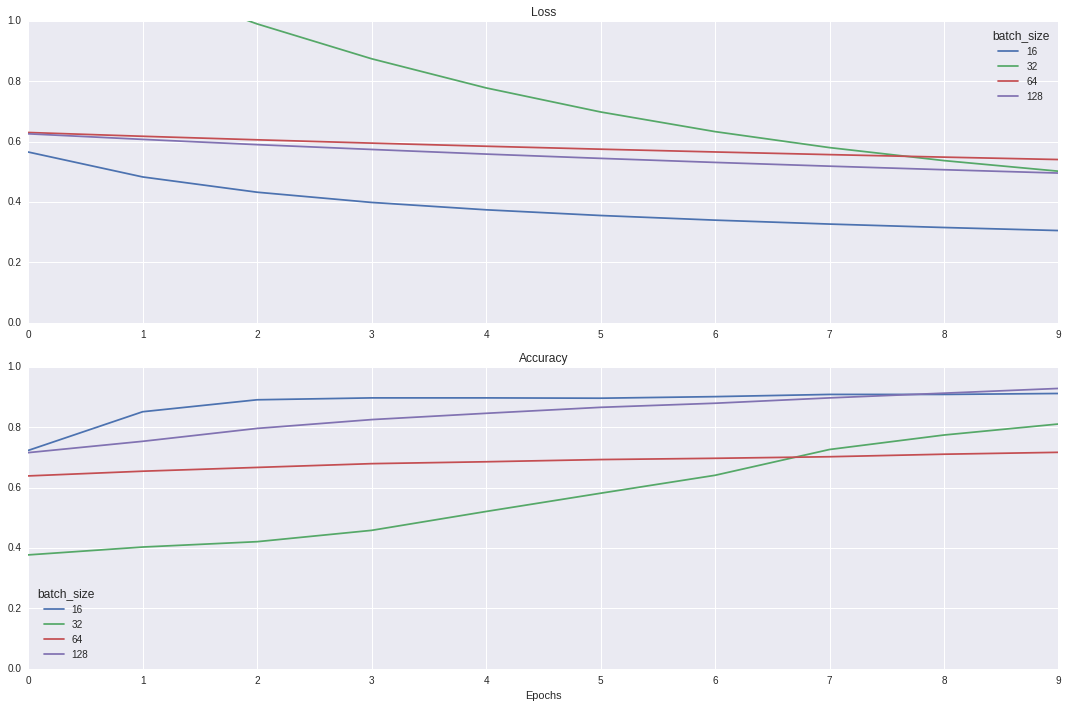

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = plt.subplot(211)
historydf.xs('loss', 
             axis = 1, 
             level = 'metric').plot(ylim = (0,1), 
                                    ax = ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', 
             axis=1, 
             level = 'metric').plot(ylim = (0,1), 
                                    ax = ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [48]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [49]:
dflist = []

optimizers = ['SGD(lr = 0.01)',
              'SGD(lr = 0.01, momentum = 0.3)',
              'SGD(lr = 0.01, momentum = 0.3, nesterov = True)',  
              'Adam(lr = 0.01)',
              'Adagrad(lr = 0.01)',
              'RMSprop(lr = 0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, 
                    input_shape = (4,), 
                    activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',
                  optimizer = eval(opt_name),
                  metrics = ['accuracy'])
    h = model.fit(X_train, y_train, 
                  batch_size = 16, 
                  epochs = 5, 
                  verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, 
                               index = h.epoch))

In [50]:
historydf = pd.concat(dflist, 
                      axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names = ['optimizers', 'metric'])
historydf.columns = idx

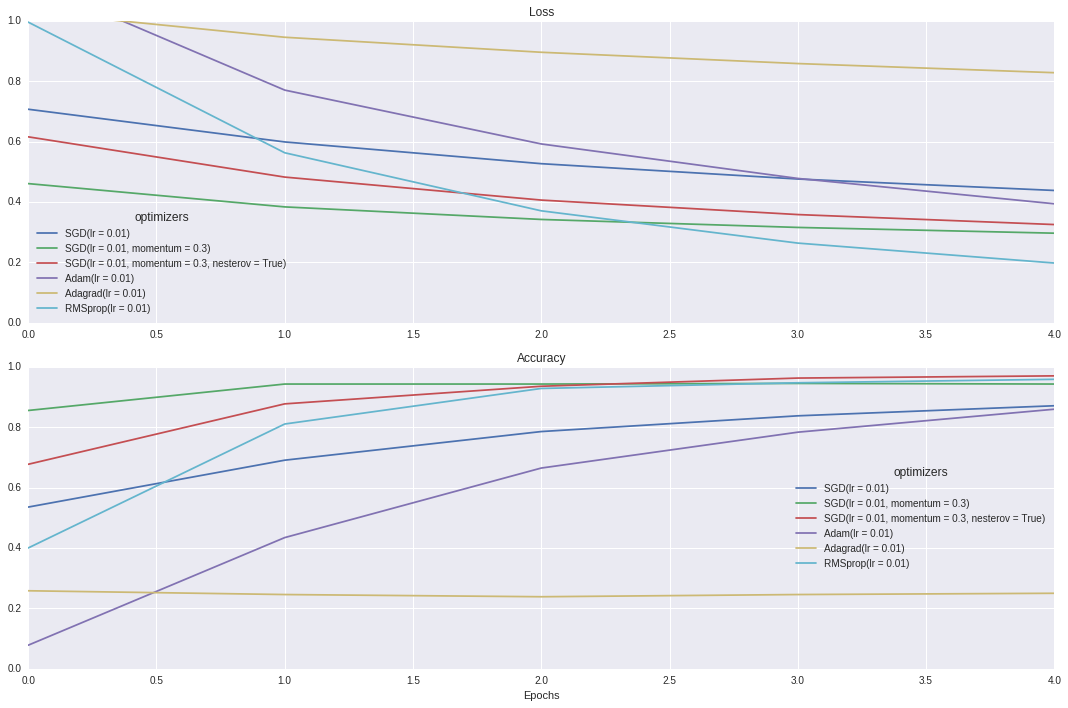

In [51]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [52]:
dflist = []

initializers = ['zeros', 
                'uniform', 
                'normal',
                'he_normal', 
                'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, 
                    input_shape = (4,),
                    kernel_initializer = init,
                    activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'rmsprop',
                  metrics = ['accuracy'])

    h = model.fit(X_train, y_train, 
                  batch_size = 16, 
                  epochs = 5, 
                  verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [53]:
historydf = pd.concat(dflist, 
                      axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names = ['initializers', 'metric'])

historydf.columns = idx

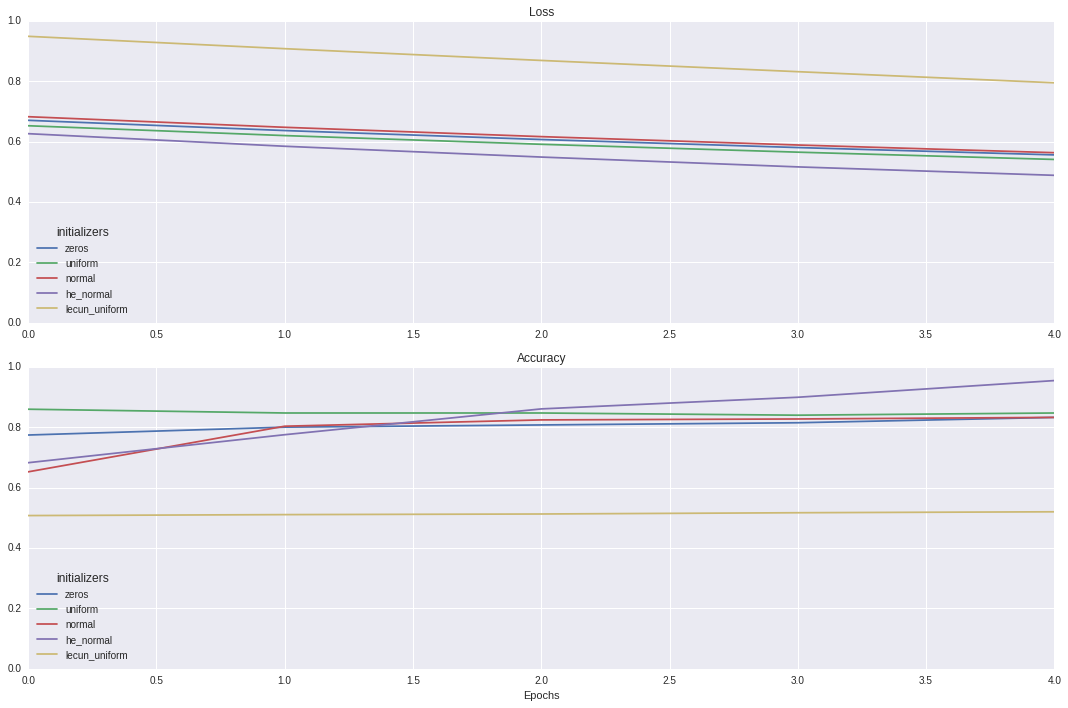

In [54]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [55]:
K.clear_session()

model = Sequential()
model.add(Dense(2, 
                input_shape = (4,), 
                activation = 'relu'))
model.add(Dense(1, 
                activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.01),
              metrics = ['accuracy'])

h = model.fit(X_train, y_train, 
              batch_size = 16, 
              epochs = 20,
              verbose = 1, 
              validation_split = 0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s - loss: 0.5139 - acc: 0.8527 - val_loss: 0.4351 - val_acc: 0.8889
Epoch 2/20
672/672 [==============================] - 0s - loss: 0.3794 - acc: 0.9018 - val_loss: 0.3098 - val_acc: 0.9306
Epoch 3/20
672/672 [==============================] - 0s - loss: 0.2523 - acc: 0.9256 - val_loss: 0.2019 - val_acc: 0.9306
Epoch 4/20
672/672 [==============================] - 0s - loss: 0.1650 - acc: 0.9435 - val_loss: 0.1351 - val_acc: 0.9583
Epoch 5/20
672/672 [=================

In [56]:
result

[0.029683218048252528, 0.98786407766990292]

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.layers

In [59]:
inp = model.layers[0].input
out = model.layers[0].output

In [60]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [61]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [62]:
features_function = K.function([inp], [out])

In [63]:
features_function

In [64]:
features_function([X_test])[0].shape

(412, 2)

In [65]:
features = features_function([X_test])[0]

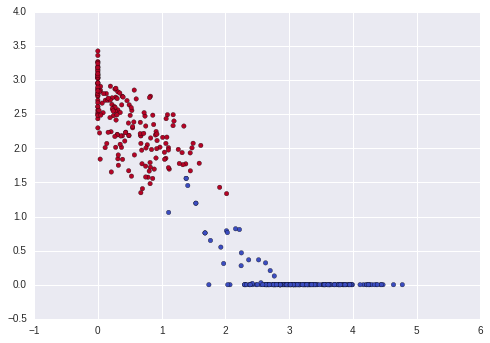

In [66]:
plt.scatter(features[:, 0], features[:, 1], c = y_test, cmap='coolwarm')

In [67]:
K.clear_session()

model = Sequential()
model.add(Dense(3, 
                input_shape = (4,), 
                activation = 'relu'))
model.add(Dense(2, 
                activation = 'relu'))
model.add(Dense(1, 
                activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.01),
              metrics = ['accuracy'])

 32/412 [=>............................] - ETA: 0s

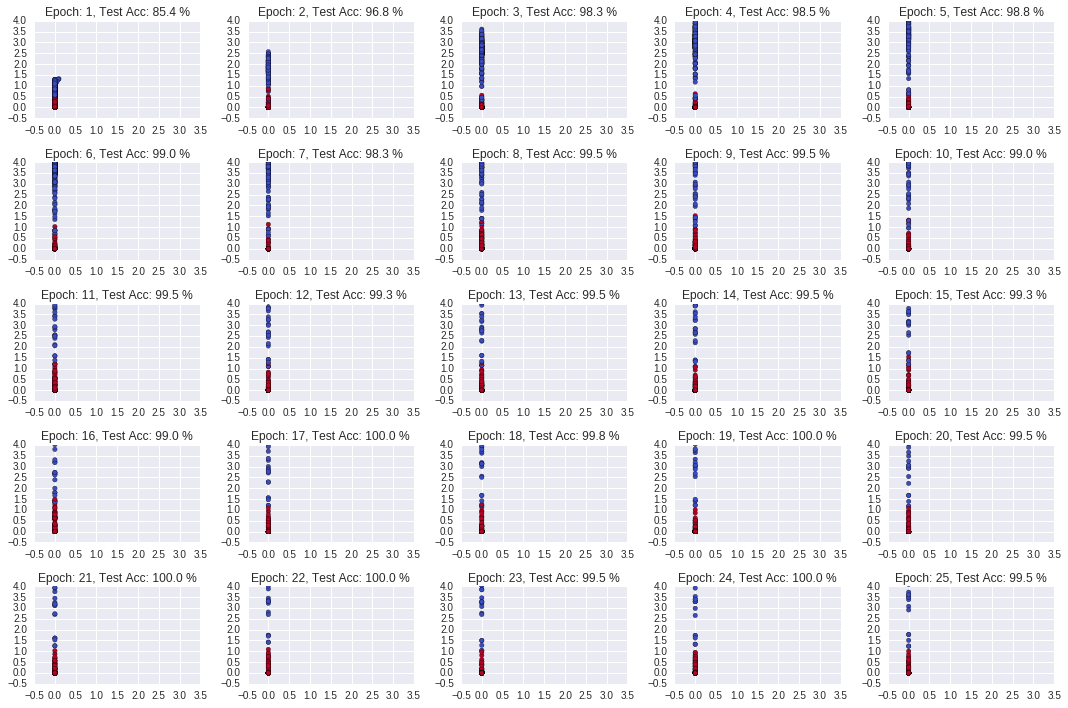

In [68]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize = (15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, 
                  batch_size = 16, 
                  epochs = 1, 
                  verbose = 0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], 
                features[:, 1], 
                c = y_test, 
                cmap = 'coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [69]:
ex1 = pd.read_csv('./data/wines.csv')

In [70]:
ex1.head()

Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280-OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [71]:
ex1.describe()

Class     Alcohol  Malic_acid         Ash  Alcalinity_of_ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color_intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280-OD315_of_diluted_wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [72]:
ex1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280-OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 20.9 KB


In [73]:
target = ex1['Class']

In [74]:
target.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [75]:
features = ex1.ix[:, ex1.columns != 'Class']

In [76]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280-OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


In [77]:
import seaborn as sns

In [78]:
#sns.pairplot(ex1, hue = 'Class')

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
minmax = MinMaxScaler()

In [81]:
features = minmax.fit_transform(features)

In [82]:
pd.DataFrame(features, 
             columns = ['Alcohol','Malic_acid','Ash',
                        'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
                        'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
                        'Color_intensity','Hue','OD280-OD315_of_diluted_wines','Proline']).head()

Alcohol  Malic_acid       Ash  Alcalinity_of_ash  Magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   Color_intensity       Hue  OD280-OD315_of_diluted_wines   Proline  
0         0.372014  0.455285                      0.970696  0.561341  
1         0.264505  0.463415                      0.780220  0.550642  
2         0.375427  0.447154                      0.695971  0.646933  
3         0.556314  0.308943                      0.798535  0.857347  
4         0.259386  0.455285                      0.608059  0.325963

In [83]:
from keras.utils import to_categorical

In [84]:
target = pd.get_dummies(ex1['Class']).values

In [85]:
target

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

In [86]:
ex1['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [87]:
pd.DataFrame(target).head()

0  1  2
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0

In [88]:
dflist = []

optimizers = ['SGD(lr = 0.01)',
              'SGD(lr = 0.01, momentum = 0.3)',
              'SGD(lr = 0.01, momentum = 0.3, nesterov = True)',  
              'Adam(lr = 0.01)',
              'Adam(lr = 0.005)',
              'Adagrad(lr = 0.01)',
              'RMSprop(lr = 0.01)']


from tqdm import tqdm
for opt_name in tqdm(optimizers):

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(130, 
                    input_shape = (13,), 
                    activation = 'tanh'))
    model.add(Dense(3, 
                    activation = 'softmax'))
    
    model.compile(optimizer = eval(opt_name),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    h = model.fit(features, target, 
                  batch_size = 16, 
                  epochs = 10, 
                  verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, 
                               index = h.epoch))

100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


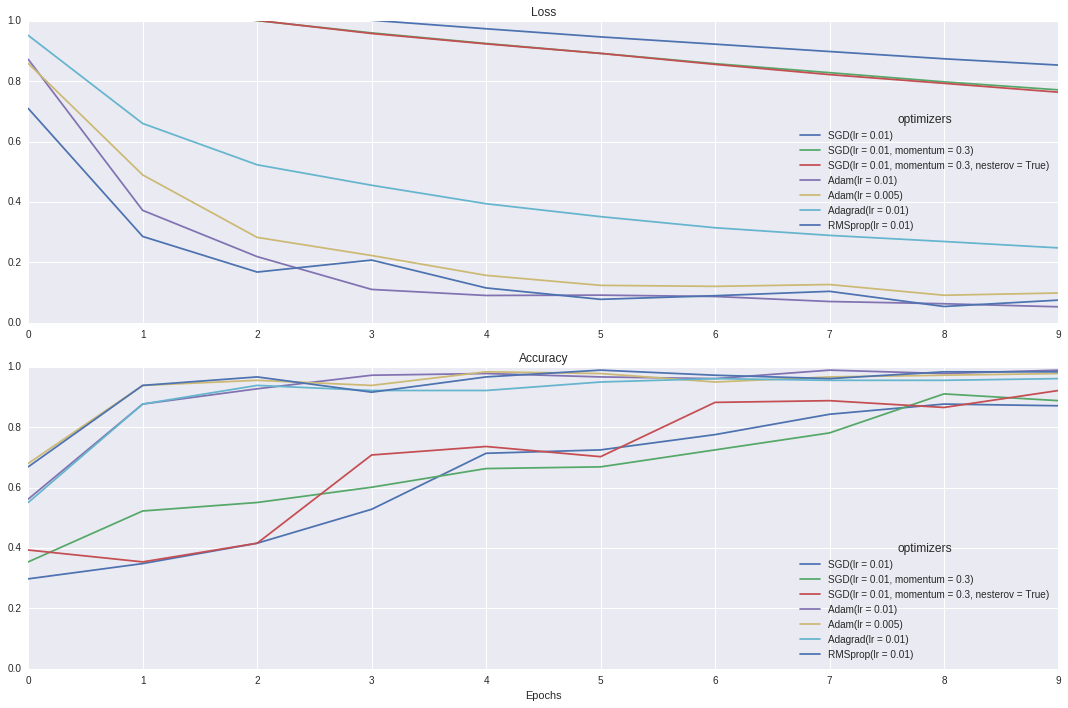

In [89]:
historydf = pd.concat(dflist, 
                      axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names = ['optimizers', 'metric'])
historydf.columns = idx

fig, ax = plt.subplots(figsize = (15, 10))
ax = plt.subplot(211)
historydf.xs('loss', 
             axis = 1, 
             level = 'metric').plot(ylim = (0,1),
                                    ax = ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', 
             axis = 1, 
             level = 'metric').plot(ylim = (0,1), 
                                    ax = ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

Adam optimizer with learning rate  = 0.01 was chosen.

In [90]:
dflist = []

batch_sizes = [2, 4, 6, 8, 10, 12, 24]


from tqdm import tqdm
for batch_size in tqdm(batch_sizes):

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(130, 
                    input_shape = (13,), 
                    activation = 'tanh'))
    model.add(Dense(3, 
                    activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = Adam(lr = 0.01),
                  metrics = ['accuracy'])
    h = model.fit(features, target, 
                  batch_size = batch_size, 
                  epochs = 10, 
                  verbose = 0)
    
    dflist.append(pd.DataFrame(h.history, 
                               index = h.epoch))

100%|██████████| 7/7 [00:06<00:00,  1.28it/s]


In [91]:
historydf = pd.concat(dflist, 
                      axis = 1)

In [92]:
historydf.head()

acc      loss       acc      loss       acc      loss       acc  \
0  0.775281  0.534448  0.814607  0.490940  0.792135  0.580454  0.792135   
1  0.932584  0.166904  0.926966  0.191171  0.943820  0.160848  0.943820   
2  0.960674  0.153262  0.910112  0.189275  0.966292  0.084538  0.966292   
3  0.955056  0.131603  0.971910  0.077607  0.966292  0.086784  0.971910   
4  0.955056  0.112539  0.960674  0.081641  0.977528  0.064221  0.983146   

       loss       acc      loss       acc      loss       acc      loss  
0  0.523907  0.601124  0.780330  0.617978  0.778610  0.640449  0.959868  
1  0.181412  0.915730  0.293618  0.938202  0.283163  0.926966  0.440373  
2  0.118144  0.949438  0.159598  0.960674  0.158171  0.955056  0.213428  
3  0.084842  0.966292  0.120925  0.960674  0.112535  0.960674  0.139418  
4  0.061501  0.971910  0.087746  0.977528  0.091744  0.977528  0.119812

In [93]:
metrics_reported = dflist[0].columns
metrics_reported

Index(['acc', 'loss'], dtype='object')

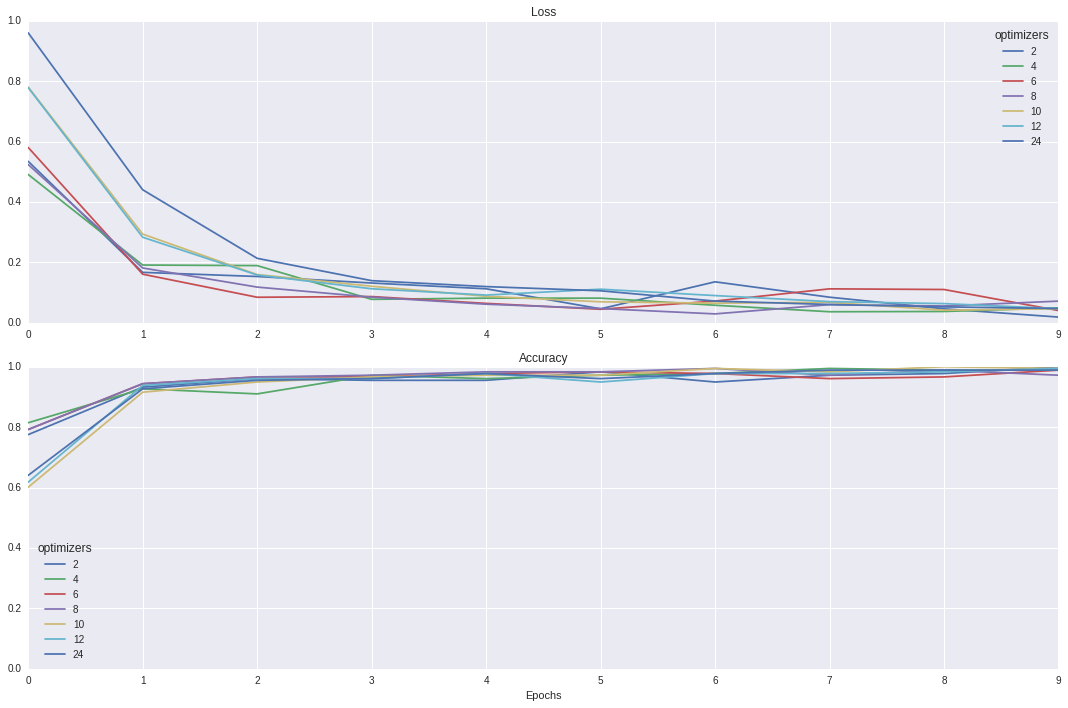

In [94]:
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names = ['optimizers', 'metric'])
historydf.columns = idx

fig, ax = plt.subplots(figsize = (15, 10))
ax = plt.subplot(211)
historydf.xs('loss', 
             axis = 1, 
             level = 'metric').plot(ylim = (0,1),
                                    ax = ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', 
             axis = 1, 
             level = 'metric').plot(ylim = (0,1), 
                                    ax = ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

Batch size of 6 was chosen!

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 7)

In [96]:
X_train.shape

(142, 13)

In [97]:
Y_train.shape

(142, 3)

In [98]:
K.clear_session()

In [99]:
model = Sequential()
model.add(Dense(130, 
                input_shape = (13, ), 
                activation = 'tanh'))
model.add(Dense(3, 
                activation = 'softmax'))

model.compile(optimizer = Adam(lr = 0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 130)               1820      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 393       
Total params: 2,213
Trainable params: 2,213
Non-trainable params: 0
_________________________________________________________________


In [101]:
from keras.callbacks import History
history = History()

In [102]:
model.fit(X_train, 
          Y_train, 
          validation_split = 0.1, 
          epochs = 200, 
          verbose = 1, callbacks = [history])

Train on 127 samples, validate on 15 samples
Epoch 1/200
127/127 [==============================] - 0s - loss: 1.0191 - acc: 0.4094 - val_loss: 0.8094 - val_acc: 0.6000
Epoch 2/200
127/127 [==============================] - 0s - loss: 0.6559 - acc: 0.8504 - val_loss: 0.5254 - val_acc: 0.9333
Epoch 3/200
127/127 [==============================] - 0s - loss: 0.4297 - acc: 0.9291 - val_loss: 0.3802 - val_acc: 0.9333
Epoch 4/200
127/127 [==============================] - 0s - loss: 0.2808 - acc: 0.9449 - val_loss: 0.2988 - val_acc: 0.9333
Epoch 5/200
127/127 [==============================] - 0s - loss: 0.1899 - acc: 0.9843 - val_loss: 0.2670 - val_acc: 0.9333
Epoch 6/200
127/127 [==============================] - 0s - loss: 0.1399 - acc: 0.9764 - val_loss: 0

In [103]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_acc', 'val_loss'])

In [104]:
# Last few values from the history
history.history['val_acc'][-5:]

[0.93333333730697632,
 0.93333333730697632,
 0.93333333730697632,
 0.93333333730697632,
 0.93333333730697632]

In [105]:
model.evaluate(X_test, Y_test)

32/36 [=========================>....] - ETA: 0s

[0.042683631356339902, 1.0]

### The model obtains 97.22 % accuracy!

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Function like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [106]:
K.clear_session()
model = Sequential()
model.add(Dense(units = 8, 
                input_shape = (13, ),
                activation = 'tanh', 
                name = 'Layer_1'))
model.add(Dense(units = 5, 
                activation = 'tanh', 
                name = 'Layer_2'))
model.add(Dense(units = 2, 
                activation = 'relu', 
                name = 'Layer_3'))
model.add(Dense(units = 3, 
                activation = 'softmax', 
                name = 'Output'))

model.compile(optimizer = Adam(lr = 0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
Layer_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
Layer_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
Output (Dense)               (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(X_train, 
          Y_train, 
          validation_split = 0.1, 
          epochs = 20, 
          verbose = 2)

Train on 127 samples, validate on 15 samples
Epoch 1/20
0s - loss: 1.0843 - acc: 0.2992 - val_loss: 1.0658 - val_acc: 0.4000
Epoch 2/20
0s - loss: 1.0568 - acc: 0.5433 - val_loss: 1.0370 - val_acc: 0.7333
Epoch 3/20
0s - loss: 1.0279 - acc: 0.7480 - val_loss: 1.0057 - val_acc: 0.8000
Epoch 4/20
0s - loss: 0.9963 - acc: 0.7323 - val_loss: 0.9729 - val_acc: 0.4667
Epoch 5/20
0s - loss: 0.9625 - acc: 0.7244 - val_loss: 0.9464 - val_acc: 0.6667
Epoch 6/20
0s - loss: 0.9313 - acc: 0.7323 - val_loss: 0.9218 - val_acc: 0.5333
Epoch 7/20
0s - loss: 0.8991 - acc: 0.6850 - val_loss: 0.9078 - val_acc: 0.4667
Epoch 8/20
0s - loss: 0.8727 - acc: 0.7087 - val_loss: 0.8947 - val_acc: 0.4667
Epoch 9/20
0s - loss: 0.8463 - acc: 0.6929 - val_loss: 0.8682 - val_acc: 0.5333
Epoch 10/20
0s - loss: 0.8219 - acc: 0.6929 - val_loss: 0.8355 - val_acc: 0.4667
Epoch 11/20
0s - loss: 0.8026 - acc: 0.7165 - val_loss: 0.8161 - val_acc: 0.7333
Epoch 12/20
0s - loss: 0.7829 - acc: 0.7165 - val_loss: 0.8097 - val_acc:

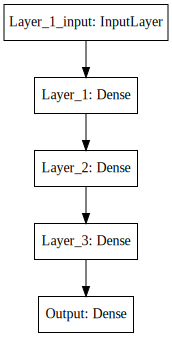

In [109]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [110]:
from keras.utils import plot_model
plot_model(model, to_file='5_model_1.png', show_shapes = True)

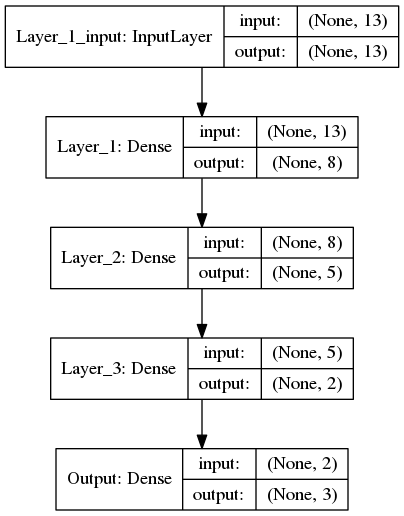

In [111]:
from IPython.display import Image
Image('5_model_1.png')

In [112]:
# Intput of the 1st layer
inp = model.layers[0].input
# Output of the 3rd layer
output = model.layers[2].output

In [113]:
feature_func = K.function([inp], [output])

In [114]:
my_features = feature_func([X_train])[0]

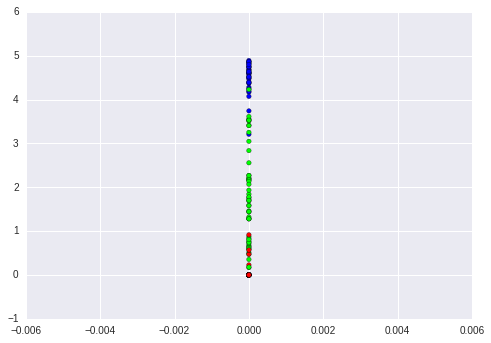

In [115]:
plt.scatter(my_features[:,0], my_features[:,1], c = Y_train)

In [116]:
model.evaluate(X_test, Y_test)

32/36 [=========================>....] - ETA: 0s

[0.65839601887596977, 0.80555555555555558]

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [132]:
K.clear_session()

In [133]:
from keras.models import Model
from keras.layers import Input

In [134]:
inputs = Input(shape = (13, ))

In [135]:
x = Dense(units = 8, 
          kernel_initializer= 'he_normal',
          activation = 'tanh')(inputs)
x = Dense(units = 5, 
          kernel_initializer= 'he_normal', 
          activation = 'tanh')(x)
second_to_last = Dense(units = 2, 
                       kernel_initializer = 'he_normal', 
                       activation = 'tanh')(x)
prediction = Dense(units = 3, 
                   activation = 'softmax')(second_to_last)


In [136]:
model = Model(inputs = inputs, outputs = prediction)
model.compile(optimizer = Adam(lr = 0.005), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [137]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


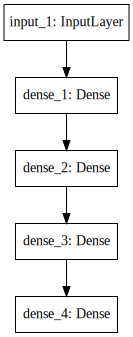

In [138]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog = 'dot', 
                               format = 'svg'))

In [139]:
model.fit(X_train, 
          Y_train,
          batch_size = 6,
          validation_split = 0.1, 
          epochs = 20, 
          verbose = 2)

Train on 127 samples, validate on 15 samples
Epoch 1/20
0s - loss: 0.9582 - acc: 0.5591 - val_loss: 0.9229 - val_acc: 0.6667
Epoch 2/20
0s - loss: 0.7510 - acc: 0.7087 - val_loss: 0.8130 - val_acc: 0.6000
Epoch 3/20
0s - loss: 0.6054 - acc: 0.7795 - val_loss: 0.7509 - val_acc: 0.8000
Epoch 4/20
0s - loss: 0.5371 - acc: 0.8346 - val_loss: 0.7553 - val_acc: 0.6667
Epoch 5/20
0s - loss: 0.4517 - acc: 0.8898 - val_loss: 0.6689 - val_acc: 0.7333
Epoch 6/20
0s - loss: 0.3868 - acc: 0.8976 - val_loss: 0.6488 - val_acc: 0.6667
Epoch 7/20
0s - loss: 0.3254 - acc: 0.9291 - val_loss: 0.6027 - val_acc: 0.7333
Epoch 8/20
0s - loss: 0.2889 - acc: 0.9370 - val_loss: 0.5550 - val_acc: 0.7333
Epoch 9/20
0s - loss: 0.2495 - acc: 0.9370 - val_loss: 0.5547 - val_acc: 0.8000
Epoch 10/20
0s - loss: 0.2176 - acc: 0.9449 - val_loss: 0.5255 - val_acc: 0.7333
Epoch 11/20
0s - loss: 0.1897 - acc: 0.9528 - val_loss: 0.4802 - val_acc: 0.8000
Epoch 12/20
0s - loss: 0.1665 - acc: 0.9606 - val_loss: 0.4839 - val_acc:

In [140]:
features_function = K.function([inputs], [second_to_last])

In [141]:
features = features_function([X_train])[0]

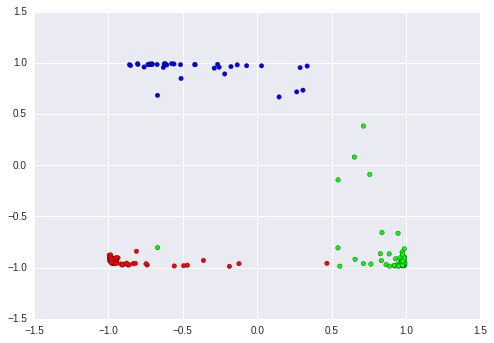

In [142]:
plt.scatter(features[:, 0], features[:, 1], c = Y_train)

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state = 42
- Reset and recompile your model
- train the model on the train data using `validation_data = (X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard